<a href="https://colab.research.google.com/github/kurtsenol/machine-learning/blob/master/TopicModeling/Medium/LDA_articles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Topic Modeling Implementation 

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Dataset

Below is our dataset:

In [ ]:
df = pd.read_excel("drive/My Drive/articles.xlsx", index_col=0)
df.head()

Title    Journal  Year                                           Abstract
0  Title 1  Journal 1  1988  PURPOSE THIS ARTICLE EXAMINES THE NEW PHENOMEN...
1  Title 2  Journal 2  1982  PURPOSE EMPLOYEE WELLNESS IS VITAL TO CREATING...
2  Title 3  Journal 3  1981  PURPOSE TO INVESTIGATE IF ONLINE TV CONTENT PL...
3  Title 4  Journal 3  1990  PURPOSE RESPONDING TO AN INCREASING CALL FOR A...
4  Title 5  Journal 3  1990  PURPOSE THE PURPOSE OF THIS STUDY IS TO IDENTI...

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6000 entries, 0 to 5999
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Title     6000 non-null   object
 1   Journal   6000 non-null   object
 2   Year      6000 non-null   int64 
 3   Abstract  6000 non-null   object
dtypes: int64(1), object(3)
memory usage: 234.4+ KB


In [ ]:
df.Journal.value_counts()

Journal 15    972
Journal 8     899
Journal 2     616
Journal 10    327
Journal 4     317
Journal 5     310
Journal 1     306
Journal 3     298
Journal 6     293
Journal 12    292
Journal 14    275
Journal 7     274
Journal 11    274
Journal 13    274
Journal 9     273
Name: Journal, dtype: int64

The number of articles per journal is as above: 

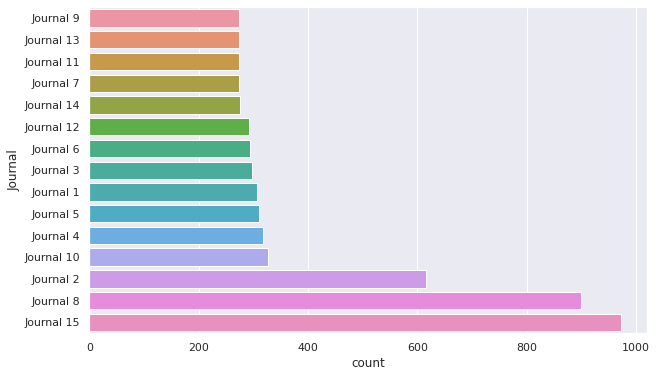

In [ ]:
# order article counts per journal and get the index
order = df.Journal.value_counts(ascending=True).index

plt.figure(figsize=(10,6))
sns.countplot(y='Journal', data=df, orient='h', order=order);

You can find graph version the same info above:

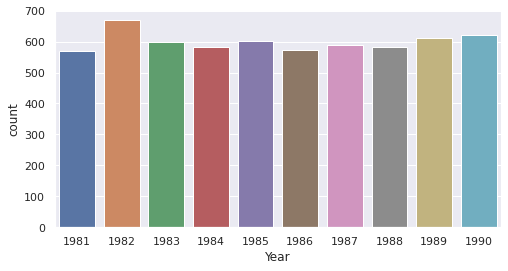

In [ ]:
plt.figure(figsize=(8,4))
sns.countplot(x='Year', data=df);

The number of yearly publications is above:

In [ ]:
pd.crosstab(df.Journal, df.Year)

Year        1981  1982  1983  1984  1985  1986  1987  1988  1989  1990
Journal                                                               
Journal 1     34    34    24    29    41    27    23    34    26    34
Journal 10    24    37    30    41    35    35    27    39    33    26
Journal 11    31    38    22    18    28    26    26    30    28    27
Journal 12    38    27    36    29    23    18    28    41    28    24
Journal 13    20    26    29    27    36    27    27    26    33    23
Journal 14    23    28    27    23    32    32    37    18    26    29
Journal 15    85   125    91    86   102    92    93    92    98   108
Journal 2     53    66    78    77    52    59    60    53    64    54
Journal 3     39    28    33    15    32    30    31    24    28    38
Journal 4     35    38    25    28    30    38    32    23    34    34
Journal 5     35    36    30    30    36    22    24    36    30    31
Journal 6     27    33    24    33    29    22    35    31    24    35
Journal 7     28    32    27    31    23    28    30    25    29    21
Journal 8     77    93    95    77    79    94    87    85    98   114
Journal 9     21    28    28    38    24    22    30    26    34    22

The number of articles per journal per year is above:

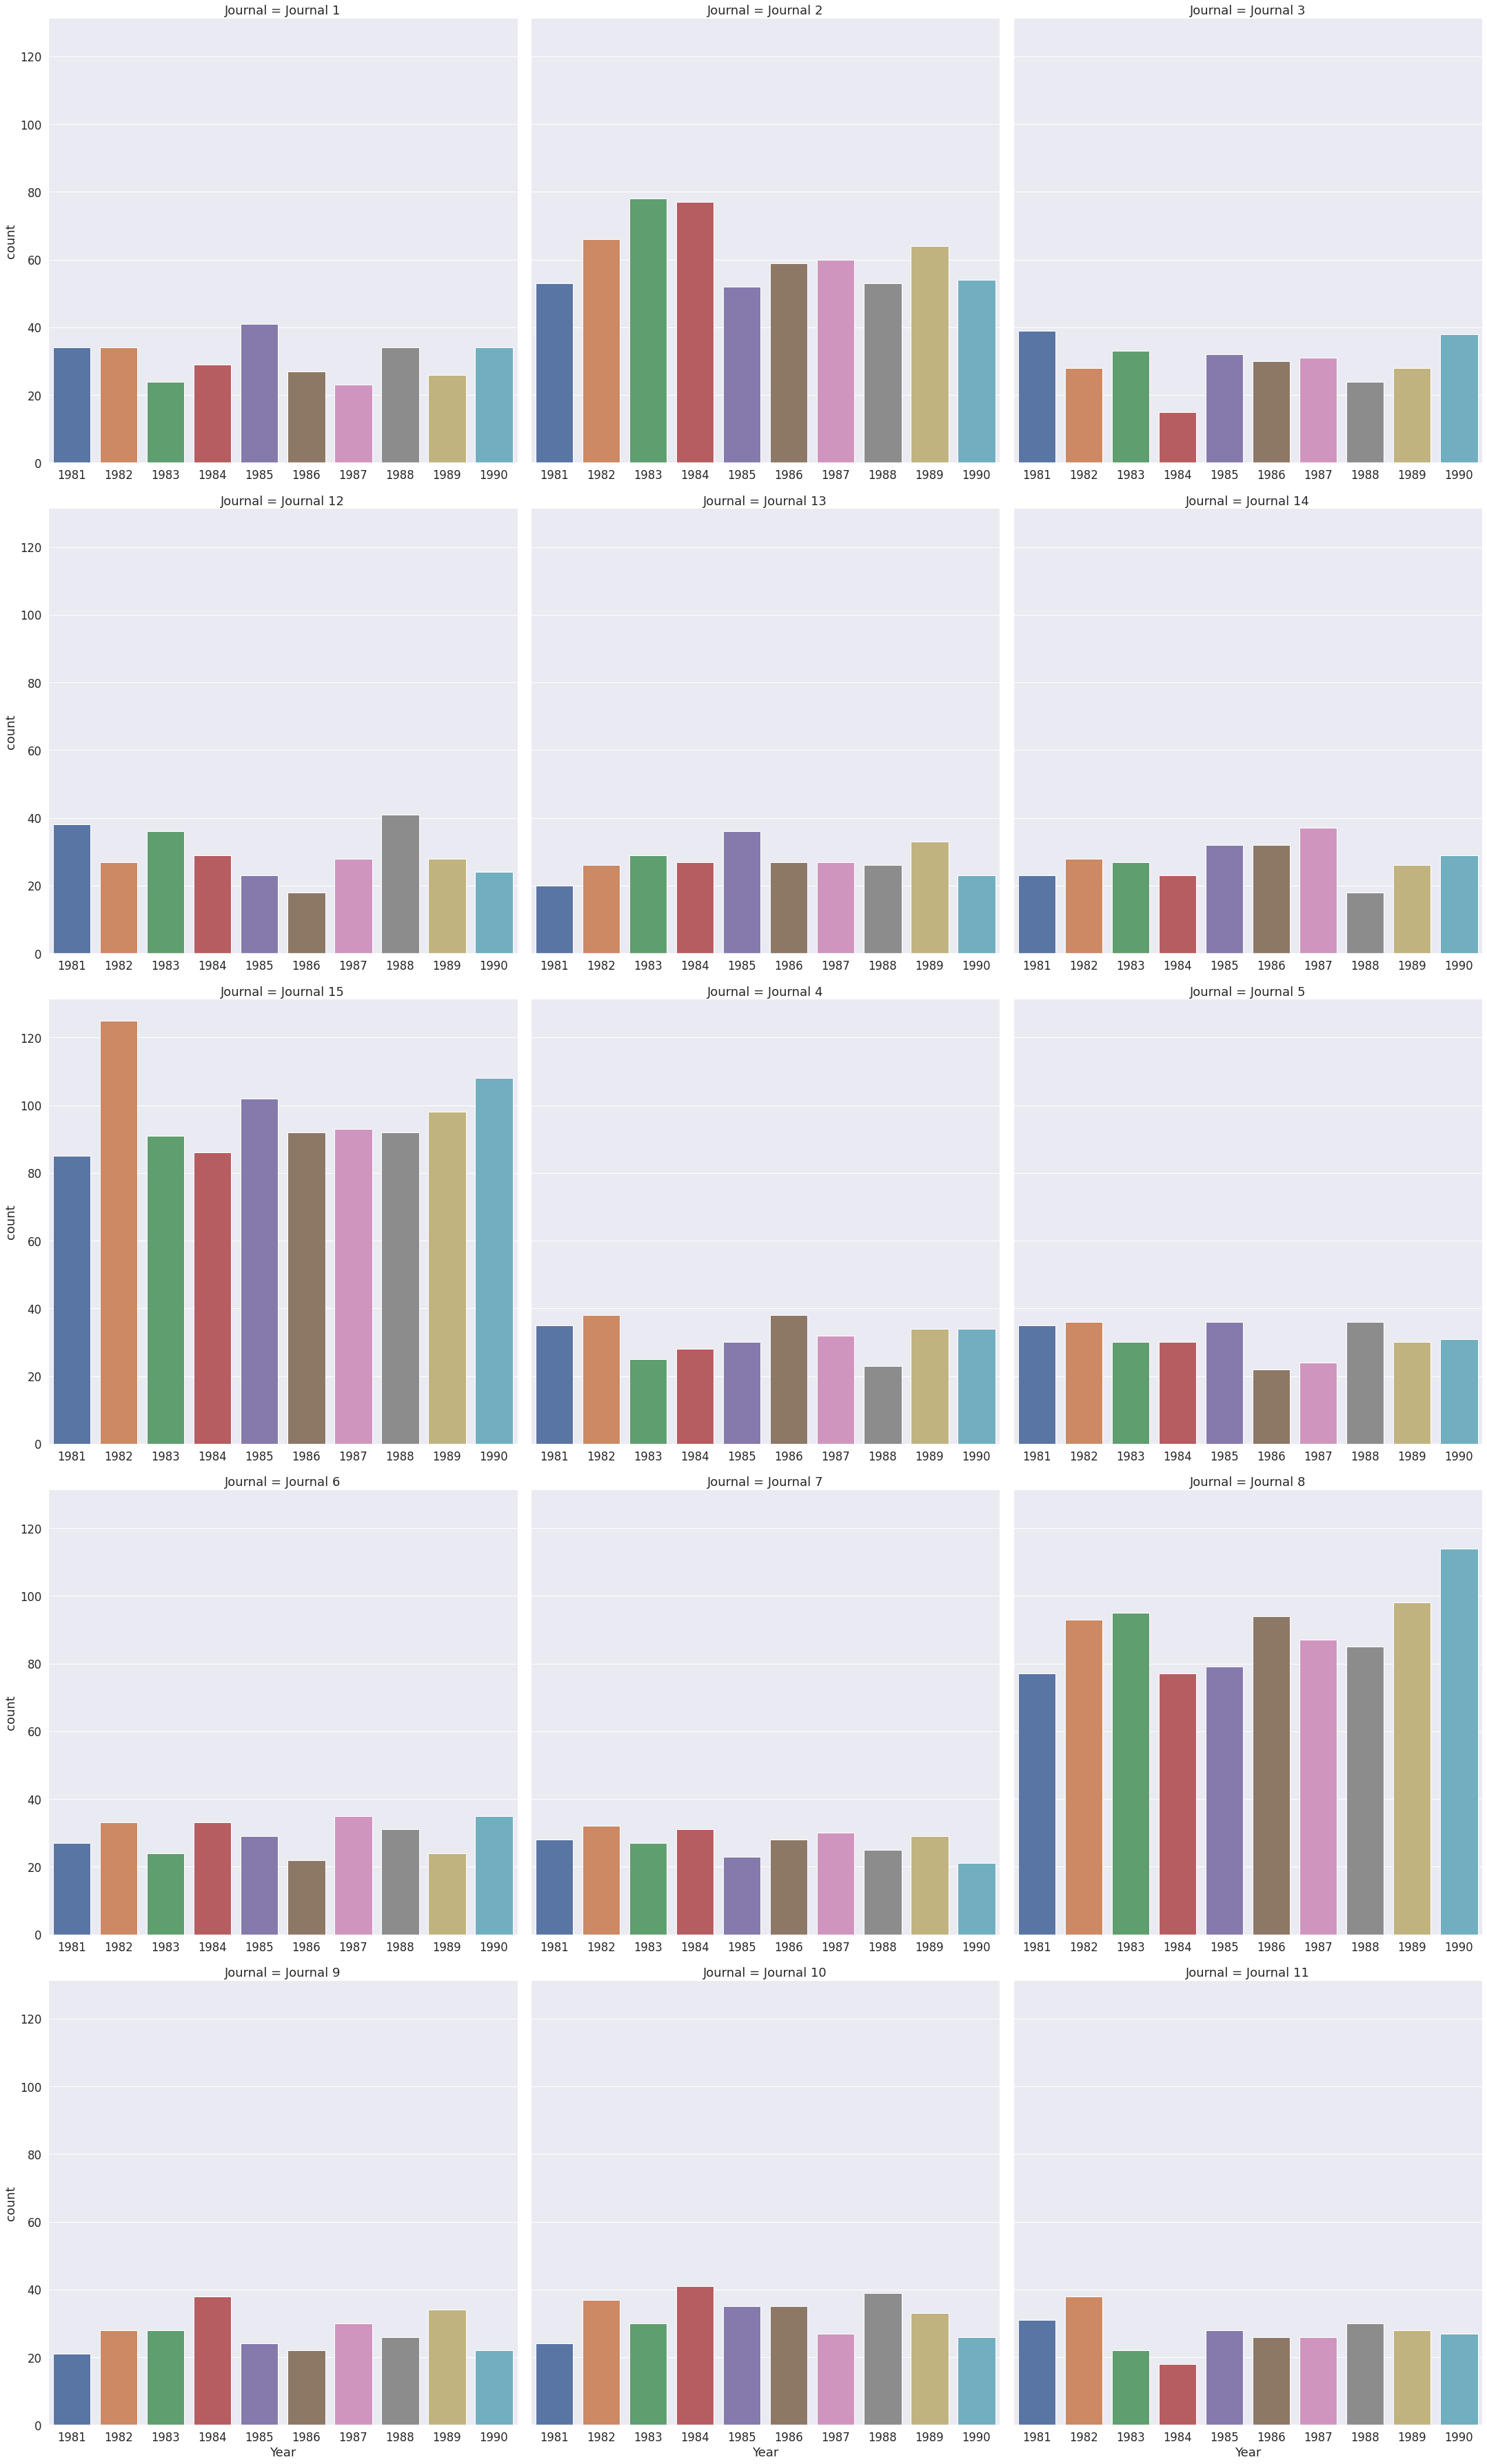

In [ ]:
sns.set(font_scale=1.5)
sns.catplot(data=df, x='Year', col="Journal", col_wrap=3, sharex=False, height=10, kind='count');


Subgraphs for the number of articles per year per journal are above:

## Analysis

In [ ]:
# import nltk library and then download stopwords
import nltk 
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
!pip install pyLDAvis

     |████████████████████████████████| 1.6MB 8.1MB/s 
     |████████████████████████████████| 552kB 44.4MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97712 sha256=5c94292c4f867f597586c0499fc4f444ce15bde4ff89545ee1ec25ac816a2170
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
  Created wheel for funcy: filename=funcy-1.14-py2.py3-none-any.whl size=32042 sha256=a66322325ebedeb037227a2cc594deb7c31a21e6ce106ec37e1b3fd0264aa969
  Stored in directory: /root/.cache/pip/wheels/20/5a/d8/1d875df03deae6f178dfdf70238cca33f948ef8a6f5209f2eb
Successfully built pyLDAvis funcy


In [ ]:
# Plotting tools
import pyLDAvis
import pyLDAvis.gensim 

In [ ]:
# spacy for lemmatization
import spacy

In [ ]:
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

/usr/local/lib/python3.6/dist-packages/scipy/sparse/sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()


### Preprocessing

In [ ]:
data = list(df.Abstract)
data[:2]

['PURPOSE THIS ARTICLE EXAMINES THE NEW PHENOMENON OF THE CONVERGENCE OF PLATFORM AND PIPELINE BUSINESS MODELS. IT EXAMINES THE POTENTIAL SYNERGIES AND CHALLENGES FOR PLATFORMS TO ADD PIPELINE COMPONENTS AND VICE VERSA FOR PIPELINE BUSINESSES. DESIGN/METHODOLOGY/APPROACH THIS PAPER USES A CONCEPTUAL APPROACH THAT SYNTHESIZES AND INTEGRATES THE LITERATURE FROM SERVICE, HOSPITALITY, AND STRATEGY, AND SUPPLEMENTS THEM WITH TWO ILLUSTRATIVE MINI-CASE STUDIES. FINDINGS WHILE THE EXTANT LITERATURE TYPICALLY FOCUSES ON THE DICHOTOMY BETWEEN INCUMBENT PIPELINE BUSINESSES THAT CREATE VALUE BY CONTROLLING A LINEAR SERIES OF ACTIVITIES AND NETWORK EFFECTS-DRIVEN PLATFORMS, WE DIFFERENTIATE BETWEEN TWO TYPES OF PLATFORM BUSINESS MODELS (I.E. PLATFORMS WITH ASSET CONTROL AND PLATFORMS WITH PEER-PROVIDED ASSETS). FURTHER, WE IDENTIFY THREE COMMON PATHWAYS OF CONVERGENCE; THAT IS, PIPELINES MOVING TOWARDS (1) PLATFORMS WITH ASSET CONTROL AND (2) THOSE WITH PEER-PROVIDED ASSETS, AND (3) PLATFORMS WITH

In [ ]:
stop_words = nltk.corpus.stopwords.words('english')

### Build the Bigram, Trigram Models and Lemmatize

In [ ]:
# Build the bigram and trigrams
bigram = gensim.models.Phrases(data, min_count=20, threshold=100) 
trigram = gensim.models.Phrases(bigram[data], threshold=100)  

bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)


/usr/local/lib/python3.6/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [ ]:
# only need tagger, no need for parser and named entity recognizer, for faster implementation
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

In [ ]:
def process_words(texts, stop_words=stop_words, allowed_tags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    
    """Convert a document into a list of lowercase tokens, build bigrams-trigrams, implement lemmatization"""
    
    # remove stopwords, short tokens and letter accents 
    texts = [[word for word in simple_preprocess(str(doc), deacc=True, min_len=3) if word not in stop_words] for doc in texts]
    
    # bi-gram and tri-gram implementation
    texts = [bigram_mod[doc] for doc in texts]
    texts = [trigram_mod[bigram_mod[doc]] for doc in texts]
    
    texts_out = []

    # implement lemmatization and filter out unwanted part of speech tags
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_tags])
    
    # remove stopwords and short tokens again after lemmatization
    texts_out = [[word for word in simple_preprocess(str(doc), deacc=True, min_len=3) if word not in stop_words] for doc in texts_out]    
    
    return texts_out

In [ ]:
data_ready = process_words(data)  

In [ ]:
data_ready[0]

['purpose',
 'article',
 'examine',
 'new',
 'convergence',
 'platform',
 'pipeline',
 'business',
 'model',
 'examine',
 'potential',
 'synergy',
 'challenge',
 'platform',
 'add',
 'pipeline',
 'component',
 'vice',
 'pipeline',
 'business',
 'design',
 'methodology',
 'approach',
 'paper',
 'use',
 'conceptual',
 'approach',
 'synthesize',
 'literature',
 'service',
 'hospitality',
 'strategy',
 'supplement',
 'illustrative',
 'mini',
 'case',
 'study',
 'finding',
 'extant',
 'literature',
 'typically',
 'focus',
 'dichotomy',
 'incumbent',
 'pipeline',
 'business',
 'create',
 'value',
 'control',
 'activity',
 'network',
 'effect',
 'drive',
 'platform',
 'differentiate',
 'type',
 'platform',
 'business',
 'model',
 'asset',
 'peer',
 'provide',
 'asset',
 'identify',
 'common',
 'pathway',
 'convergence',
 'pipeline',
 'move',
 'asset',
 'control',
 'peer',
 'provide',
 'asset',
 'platform',
 'peer',
 'provide',
 'asset',
 'adopt',
 'define',
 'business',
 'characteristic',
 'p

Above we preprocess the corpus that includes: 
- removing stop words,
- doing lemmatization,
- implementing ngrams,
- selection of tokens based on speech of tags (*keep the words that are either noun, adjective, verb or adverb*)

### Create the Dictionary and Corpus needed for Topic Modeling

In [ ]:
# Create Dictionary
id2word = corpora.Dictionary(data_ready)

print('Total Vocabulary Size:', len(id2word))

Total Vocabulary Size: 12835


After preprocessing step we form a dictionary that the model requires.

In [ ]:
# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in data_ready]

In [ ]:
corpus

[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 2),
  (5, 3),
  (6, 10),
  (7, 12),
  (8, 1),
  (9, 8),
  (10, 2),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 2),
  (17, 3),
  (18, 6),
  (19, 1),
  (20, 2),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 4),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 2),
  (36, 2),
  (37, 1),
  (38, 1),
  (39, 1),
  (40, 1),
  (41, 2),
  (42, 1),
  (43, 1),
  (44, 1),
  (45, 2),
  (46, 1),
  (47, 3),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 1),
  (54, 1),
  (55, 8),
  (56, 1),
  (57, 1),
  (58, 1),
  (59, 1),
  (60, 1),
  (61, 1),
  (62, 1),
  (63, 1),
  (64, 1),
  (65, 6),
  (66, 11),
  (67, 8),
  (68, 5),
  (69, 1),
  (70, 6),
  (71, 1),
  (72, 1),
  (73, 1),
  (74, 2),
  (75, 1),
  (76, 2),
  (77, 3),
  (78, 1),
  (79, 1),
  (80, 1),
  (81, 1),
  (82, 7),
  (83, 1),
  (84, 1),
  (85, 1),
  (86, 1),
  (87, 1),
  (88, 1),
  (89, 2),
  (90, 1)],
 [(4,

In [ ]:
dict_corpus = {}

for i in range(len(corpus)):
  for idx, freq in corpus[i]:
    if id2word[idx] in dict_corpus:
      dict_corpus[id2word[idx]] += freq
    else:
       dict_corpus[id2word[idx]] = freq


In [ ]:
dict_df = pd.DataFrame.from_dict(dict_corpus, orient='index', columns=['freq'])

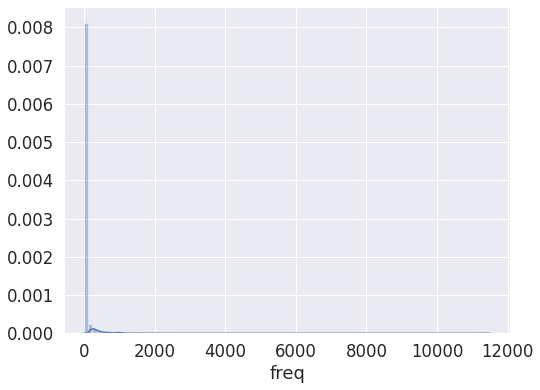

In [ ]:
plt.figure(figsize=(8,6))
sns.distplot(dict_df['freq'], bins=100);

Above is the graph for word frequencies of our dictionary, just to have general idea about the words and their frequencies. Most of the words have frequency values less than 1000. 

Below you can find the list of high frequency words in descending order. We will add those words that appear 1500 times or  more to stop list and restart the preprocess step to get better topic clusters. As expected, sector specific and general writing words have high frequencies.  

In [ ]:
dict_df.sort_values('freq', ascending=False).head(10)

freq
tourism      11500
study         6997
tourist       5560
use           4572
destination   3815
research      3403
result        3273
experience    3102
service       2997
paper         2936

In [ ]:
extension = dict_df[dict_df.freq>1500].index.tolist()

In [ ]:
extension

['also',
 'approach',
 'effect',
 'examine',
 'finding',
 'implication',
 'model',
 'paper',
 'provide',
 'service',
 'study',
 'use',
 'value',
 'customer',
 'factor',
 'influence',
 'research',
 'base',
 'experience',
 'result',
 'analysis',
 'development',
 'hotel',
 'impact',
 'show',
 'social',
 'relationship',
 'tourism',
 'destination',
 'travel',
 'tourist',
 'visitor']

In [ ]:
#ids = [id2word.token2id[extension[i]] for i in range(len(extension))]

In [ ]:
#id2word.filter_tokens(bad_ids=ids)

In [ ]:
stop_words.extend(extension)

In [ ]:
data_ready = process_words(data)

In [ ]:
# Create Dictionary
id2word = corpora.Dictionary(data_ready)

print('Total Vocabulary Size:', len(id2word))

Total Vocabulary Size: 12908


 After removing the high frequency words there remains **12908** words in our dictionary.

Next, we removed all terms that occur fewer than 10 times across all documents and all
terms that occur in more than 50% of all the documents. We are interested in finding different themes and topics and not recurring themes.

In [ ]:
# Filter out words that occur less than 10 documents, or more than 50% of the documents.

id2word.filter_extremes(no_below=10, no_above=0.5)

print('Total Vocabulary Size:', len(id2word))

Total Vocabulary Size: 3176


After final step there are **3176** words in the dictionary.

In [ ]:
# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in data_ready]

### Build the Topic Model

In [ ]:
!wget http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip

--2020-06-30 21:13:49--  http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
Resolving mallet.cs.umass.edu (mallet.cs.umass.edu)... 128.119.246.70
Connecting to mallet.cs.umass.edu (mallet.cs.umass.edu)|128.119.246.70|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16184794 (15M) [application/zip]
Saving to: ‘mallet-2.0.8.zip’

mallet-2.0.8.zip    100%[===================>]  15.43M  18.2MB/s    in 0.8s    

2020-06-30 21:13:50 (18.2 MB/s) - ‘mallet-2.0.8.zip’ saved [16184794/16184794]



In [ ]:
!unzip mallet-2.0.8.zip

Archive:  mallet-2.0.8.zip
   creating: mallet-2.0.8/
   creating: mallet-2.0.8/bin/
  inflating: mallet-2.0.8/bin/classifier2info  
  inflating: mallet-2.0.8/bin/csv2classify  
  inflating: mallet-2.0.8/bin/csv2vectors  
  inflating: mallet-2.0.8/bin/mallet  
  inflating: mallet-2.0.8/bin/mallet.bat  
  inflating: mallet-2.0.8/bin/mallethon  
  inflating: mallet-2.0.8/bin/prepend-license.sh  
  inflating: mallet-2.0.8/bin/svmlight2vectors  
  inflating: mallet-2.0.8/bin/text2classify  
  inflating: mallet-2.0.8/bin/text2vectors  
  inflating: mallet-2.0.8/bin/vectors2classify  
  inflating: mallet-2.0.8/bin/vectors2info  
  inflating: mallet-2.0.8/bin/vectors2topics  
  inflating: mallet-2.0.8/bin/vectors2vectors  
  inflating: mallet-2.0.8/build.xml  
   creating: mallet-2.0.8/class/
   creating: mallet-2.0.8/class/cc/
   creating: mallet-2.0.8/class/cc/mallet/
   creating: mallet-2.0.8/class/cc/mallet/classify/
  inflating: mallet-2.0.8/class/cc/mallet/classify/AdaBoost.class  
  in

In [ ]:
mallet_path = '/content/mallet-2.0.8/bin/mallet'

In [ ]:
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=10, id2word=id2word)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


Below you can find the 10 topics formed by the model. For each topic there are 10 terms and their relative weights next to it in descending order.

In [ ]:
from pprint import pprint
# display topics
pprint(ldamallet.show_topics(formatted=False))

[(0,
  [('purpose', 0.027094046096421392),
   ('design', 0.02531909895330323),
   ('brand', 0.02435331889013599),
   ('performance', 0.023909582104356453),
   ('develop', 0.018349821200177495),
   ('firm', 0.016261648090626715),
   ('network', 0.015504685338414554),
   ('business', 0.015452481010675785),
   ('methodology', 0.014434496619769779),
   ('system', 0.014042964161729007)]),
 (1,
  [('satisfaction', 0.038712042180054695),
   ('quality', 0.02523472523754476),
   ('positive', 0.022020469732427328),
   ('negative', 0.02049792765105591),
   ('behavior', 0.02021597541376491),
   ('tour', 0.019708461386641105),
   ('motivation', 0.0195110948205374),
   ('employee', 0.018129528857811487),
   ('high', 0.01750923393577128),
   ('level', 0.016804353342543772)]),
 (2,
  [('cultural', 0.027766714082503557),
   ('place', 0.022873399715504977),
   ('site', 0.022788051209103842),
   ('explore', 0.017724039829302988),
   ('form', 0.016187766714082504),
   ('heritage', 0.015248933143669987),
 

In [ ]:
# Compute Coherence Score
coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=data_ready, dictionary=id2word, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('Coherence Score: ', coherence_ldamallet)

Coherence Score:  0.4070009048684816


In [ ]:
import pickle
pickle.dump(ldamallet, open("drive/My Drive/ldamallet.pkl", "wb"))

In [ ]:
ldamallet = pickle.load(open("drive/My Drive/ldamallet.pkl", "rb"))

In [ ]:
tm = ldamallet[corpus[1]]
tm

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


[(0, 0.18991331757289207),
 (1, 0.16390858944050435),
 (2, 0.07013396375098505),
 (3, 0.06382978723404256),
 (4, 0.15681639085894408),
 (5, 0.10165484633569741),
 (6, 0.04255319148936171),
 (7, 0.07643814026792752),
 (8, 0.09062253743104809),
 (9, 0.04412923561859733)]

In [ ]:
tm_results = ldamallet[corpus]

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [ ]:
tm_results

[[(0, 0.33645443196005),
  (1, 0.03183520599250937),
  (2, 0.04119850187265918),
  (3, 0.05118601747815232),
  (4, 0.17478152309612988),
  (5, 0.06803995006242199),
  (6, 0.07490636704119852),
  (7, 0.116729088639201),
  (8, 0.07240948813982523),
  (9, 0.032459425717852694)],
 [(0, 0.19858156028368795),
  (1, 0.16233254531126873),
  (2, 0.06698187549251379),
  (3, 0.062253743104806934),
  (4, 0.15918045705279749),
  (5, 0.09456264775413711),
  (6, 0.037825059101654845),
  (7, 0.07801418439716312),
  (8, 0.08983451536643026),
  (9, 0.0504334121355398)],
 [(0, 0.14216701173222912),
  (1, 0.1069703243616287),
  (2, 0.09937888198757763),
  (3, 0.05659075224292615),
  (4, 0.04209799861973775),
  (5, 0.06625258799171843),
  (6, 0.12008281573498965),
  (7, 0.2180814354727398),
  (8, 0.04071773636991028),
  (9, 0.10766045548654245)],
 [(0, 0.18967452300785634),
  (1, 0.06228956228956229),
  (2, 0.05611672278338945),
  (3, 0.07575757575757576),
  (4, 0.07968574635241302),
  (5, 0.08193041526374

In [ ]:
corpus_topics = [sorted(topics, key=lambda record: -record[1])[0] for topics in tm_results]

In [ ]:
corpus_topics

[(0, 0.33645443196005),
 (0, 0.19858156028368795),
 (7, 0.2180814354727398),
 (8, 0.2962962962962963),
 (0, 0.3395931142410016),
 (0, 0.29475308641975306),
 (0, 0.2618135376756066),
 (1, 0.1888111888111888),
 (8, 0.40256839754327195),
 (0, 0.19330289193302894),
 (0, 0.2305236270753512),
 (0, 0.15267785771382894),
 (0, 0.24597701149425288),
 (0, 0.19619619619619622),
 (8, 0.29576338928856916),
 (0, 0.24287118977384467),
 (0, 0.31721798134011875),
 (0, 0.18372703412073493),
 (0, 0.3324851569126378),
 (8, 0.15004748338081672),
 (1, 0.1717171717171717),
 (0, 0.31450094161958575),
 (1, 0.2663514578408196),
 (0, 0.31547619047619047),
 (0, 0.35599415204678364),
 (0, 0.18085969180859693),
 (0, 0.25555555555555554),
 (0, 0.3245942571785268),
 (0, 0.3333333333333333),
 (8, 0.2766081871345029),
 (0, 0.28531073446327687),
 (0, 0.2852233676975945),
 (0, 0.3035087719298245),
 (0, 0.30921619293712316),
 (0, 0.2285456187895213),
 (0, 0.3204365079365079),
 (0, 0.3800131492439185),
 (0, 0.23671497584541

In [ ]:
topics = [[(term, round(wt, 3)) for term, wt in ldamallet.show_topic(n, topn=20)] for n in range(0, ldamallet.num_topics)]


In [ ]:
topics

[[('purpose', 0.027),
  ('design', 0.025),
  ('brand', 0.024),
  ('performance', 0.024),
  ('develop', 0.018),
  ('firm', 0.016),
  ('network', 0.016),
  ('business', 0.015),
  ('methodology', 0.014),
  ('system', 0.014),
  ('strategy', 0.014),
  ('framework', 0.014),
  ('marketing', 0.014),
  ('manager', 0.014),
  ('resource', 0.012),
  ('creation', 0.012),
  ('innovation', 0.012),
  ('practical', 0.011),
  ('technology', 0.01),
  ('create', 0.01)],
 [('satisfaction', 0.039),
  ('quality', 0.025),
  ('positive', 0.022),
  ('negative', 0.02),
  ('behavior', 0.02),
  ('tour', 0.02),
  ('motivation', 0.02),
  ('employee', 0.018),
  ('high', 0.018),
  ('level', 0.017),
  ('loyalty', 0.016),
  ('attribute', 0.014),
  ('affect', 0.014),
  ('investigate', 0.014),
  ('guide', 0.013),
  ('role', 0.013),
  ('group', 0.012),
  ('low', 0.012),
  ('emotion', 0.012),
  ('importance', 0.012)],
 [('cultural', 0.028),
  ('place', 0.023),
  ('site', 0.023),
  ('explore', 0.018),
  ('form', 0.016),
  ('

Below is the Topic-Term matrix shows 10 terms that forms each topic.   

In [ ]:
topics_df = pd.DataFrame([[term for term, wt in topic] for topic in topics], columns = ['Term'+str(i) for i in range(1, 21)],
                         index=['Topic '+str(t) for t in range(1, ldamallet.num_topics+1)]).T
topics_df.head()

Topic 1       Topic 2   Topic 3  ...      Topic 8     Topic 9    Topic 10
Term1      purpose  satisfaction  cultural  ...  information     article    perceive
Term2       design       quality     place  ...     consumer  literature   intention
Term3        brand      positive      site  ...     decision     discuss  perception
Term4  performance      negative   explore  ...       online     present    resident
Term5      develop      behavior      form  ...         type      method       image

[5 rows x 10 columns]

In [ ]:
pd.set_option('display.max_colwidth', -1)

topics_df = pd.DataFrame([', '.join([term for term, wt in topic]) for topic in topics], columns = ['Terms per Topic'],
                         index=['Topic'+str(t) for t in range(1, ldamallet.num_topics+1)] )
topics_df

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


Terms per Topic
Topic1   purpose, design, brand, performance, develop, firm, network, business, methodology, system, strategy, framework, marketing, manager, resource, creation, innovation, practical, technology, create  
Topic2   satisfaction, quality, positive, negative, behavior, tour, motivation, employee, high, level, loyalty, attribute, affect, investigate, guide, role, group, low, emotion, importance                 
Topic3   cultural, place, site, explore, form, heritage, people, host, culture, identity, attraction, individual, authenticity, volunteer, power, participant, interview, suggest, draw, world               
Topic4   local, management, process, knowledge, case, stakeholder, develop, role, identify, structure, rural, key, public, explore, focus, interest, government, level, political, sector                    
Topic5   community, change, activity, area, risk, benefit, climate, increase, nature, industry, natural, participation, include, small, home, business, strategy, project, leisure, condition                
Topic6   sustainable, environmental, industry, policy, sustainability, issue, practice, behaviour, global, concern, include, conservation, good, action, operator, suggest, term, management, problem, agency
Topic7   economic, country, market, demand, growth, time, international, price, measure, economy, long, datum, variable, increase, number, region, income, rate, estimate, period                            
Topic8   information, consumer, decision, online, type, traveler, medium, characteristic, product, difference, share, choice, make, review, segment, identify, trip, marketing, preference, response         
Topic9   article, literature, discuss, present, method, chinese, work, future, hospitality, contribution, attention, understand, researcher, gap, qualitative, conduct, field, order, emerge, aspect         
Topic10  perceive, intention, perception, resident, image, event, attitude, dimension, support, theory, test, significant, scale, food, theoretical, construct, structural, survey, emotional, propose

### WordClouds

In [ ]:
from wordcloud import WordCloud

In [ ]:
wc = WordCloud(background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

In [ ]:
plt.rcParams['figure.figsize'] = [20, 15]

Below is the word clouds, one for each topic. The font sizes of words show their relative weights in the topic.

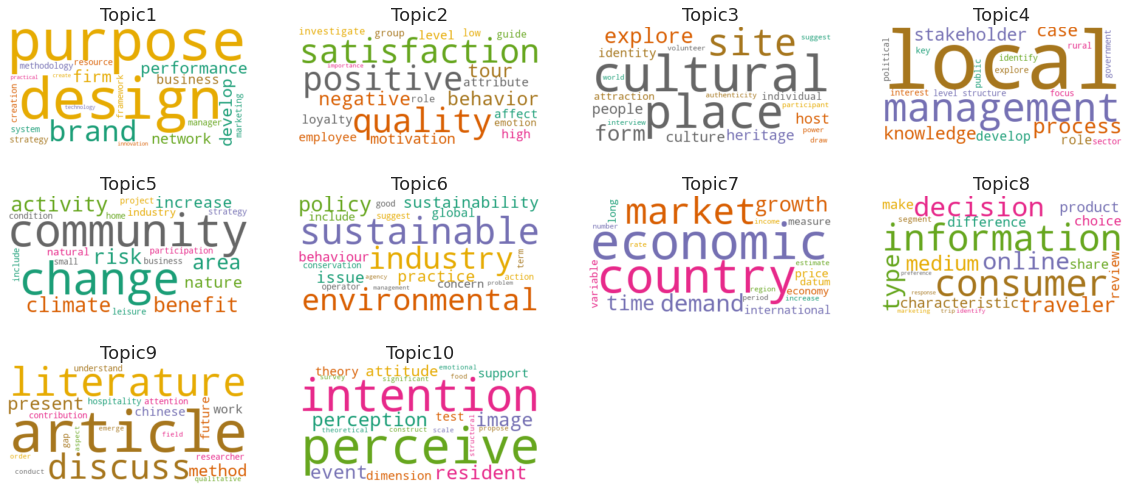

In [ ]:
# Create subplots for each topic
for i in range(10):

    wc.generate(text=topics_df["Terms per Topic"][i])
    
    plt.subplot(5, 4, i+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(topics_df.index[i])

plt.show()

In [ ]:
from gensim.models.ldamodel import LdaModel
def convertldaMalletToldaGen(mallet_model):
    model_gensim = LdaModel(
        id2word=mallet_model.id2word, num_topics=mallet_model.num_topics,
        alpha=mallet_model.alpha) # original function has 'eta=0' argument
    model_gensim.state.sstats[...] = mallet_model.wordtopics
    model_gensim.sync_state()
    return model_gensim

In [ ]:
ldagensim = convertldaMalletToldaGen(ldamallet)

Below is an interactive graph shows the topics and relative terms. You can hover over bubbles and get the most relevant 30 words on the right.


In [ ]:
import pyLDAvis.gensim as gensimvis

vis_data = gensimvis.prepare(ldagensim, corpus, id2word, sort_topics=False)
pyLDAvis.display(vis_data)

Below table shows the dominant topic, its weight and the title of each document. 

In [ ]:
# create a dataframe 
corpus_topic_df = pd.DataFrame()

# get the Titles from the original dataframe
corpus_topic_df['Title'] = df.Title

corpus_topic_df['Dominant Topic'] = [item[0]+1 for item in corpus_topics]
corpus_topic_df['Contribution %'] = [round(item[1]*100, 2) for item in corpus_topics]
corpus_topic_df['Topic Terms'] = [topics_df.iloc[t[0]]['Terms per Topic'] for t in corpus_topics]

corpus_topic_df.head()

Title  ...                                                                                                                                                                                         Topic Terms
0  Title 1  ...  purpose, design, brand, performance, develop, firm, network, business, methodology, system, strategy, framework, marketing, manager, resource, creation, innovation, practical, technology, create
1  Title 2  ...  purpose, design, brand, performance, develop, firm, network, business, methodology, system, strategy, framework, marketing, manager, resource, creation, innovation, practical, technology, create
2  Title 3  ...  information, consumer, decision, online, type, traveler, medium, characteristic, product, difference, share, choice, make, review, segment, identify, trip, marketing, preference, response       
3  Title 4  ...  article, literature, discuss, present, method, chinese, work, future, hospitality, contribution, attention, understand, researcher, gap, qualitative, conduct, field, order, emerge, aspect       
4  Title 5  ...  purpose, design, brand, performance, develop, firm, network, business, methodology, system, strategy, framework, marketing, manager, resource, creation, innovation, practical, technology, create

[5 rows x 4 columns]

### Dominant Topics Distribution Across Corpus

The first thing we can do is look at the overall distribution of each topic across the corpus of research papers.

In [ ]:
dominant_topic_df = corpus_topic_df.groupby('Dominant Topic').agg(
                                  Doc_Count = ('Dominant Topic', np.size),
                                  Total_Docs_Perc = ('Dominant Topic', np.size)).reset_index()

dominant_topic_df['Total_Docs_Perc'] = dominant_topic_df['Total_Docs_Perc'].apply(lambda row: round((row*100) / len(corpus), 2))

dominant_topic_df

Dominant Topic  Doc_Count  Total_Docs_Perc
0  1               532        8.87           
1  2               555        9.25           
2  3               779        12.98          
3  4               443        7.38           
4  5               508        8.47           
5  6               478        7.97           
6  7               831        13.85          
7  8               661        11.02          
8  9               458        7.63           
9  10              755        12.58

In [ ]:
topic_counts = dominant_topic_df[["Dominant Topic", 	"Doc_Count", "Total_Docs_Perc"]]
topic_counts.columns  = ["Dominant Topic", 	"Document Count", "Total Document Percentage"]
topic_counts

Dominant Topic  Document Count  Total Document Percentage
0  1               532             8.87                     
1  2               555             9.25                     
2  3               779             12.98                    
3  4               443             7.38                     
4  5               508             8.47                     
5  6               478             7.97                     
6  7               831             13.85                    
7  8               661             11.02                    
8  9               458             7.63                     
9  10              755             12.58

### Relevant Research Papers per Topic Based on Dominance



In [ ]:
corpus_topic_df.groupby('Dominant Topic').apply(lambda topic_set: (topic_set.sort_values(by=['Contribution %'], ascending=False).iloc[0])).reset_index(drop=True)

Title  ...                                                                                                                                                                                           Topic Terms
0  Title 62    ...  purpose, design, brand, performance, develop, firm, network, business, methodology, system, strategy, framework, marketing, manager, resource, creation, innovation, practical, technology, create  
1  Title 2519  ...  satisfaction, quality, positive, negative, behavior, tour, motivation, employee, high, level, loyalty, attribute, affect, investigate, guide, role, group, low, emotion, importance                 
2  Title 1784  ...  cultural, place, site, explore, form, heritage, people, host, culture, identity, attraction, individual, authenticity, volunteer, power, participant, interview, suggest, draw, world               
3  Title 923   ...  local, management, process, knowledge, case, stakeholder, develop, role, identify, structure, rural, key, public, explore, focus, interest, government, level, political, sector                    
4  Title 2724  ...  community, change, activity, area, risk, benefit, climate, increase, nature, industry, natural, participation, include, small, home, business, strategy, project, leisure, condition                
5  Title 4211  ...  sustainable, environmental, industry, policy, sustainability, issue, practice, behaviour, global, concern, include, conservation, good, action, operator, suggest, term, management, problem, agency
6  Title 865   ...  economic, country, market, demand, growth, time, international, price, measure, economy, long, datum, variable, increase, number, region, income, rate, estimate, period                            
7  Title 3566  ...  information, consumer, decision, online, type, traveler, medium, characteristic, product, difference, share, choice, make, review, segment, identify, trip, marketing, preference, response         
8  Title 278   ...  article, literature, discuss, present, method, chinese, work, future, hospitality, contribution, attention, understand, researcher, gap, qualitative, conduct, field, order, emerge, aspect         
9  Title 3766  ...  perceive, intention, perception, resident, image, event, attitude, dimension, support, theory, test, significant, scale, food, theoretical, construct, structural, survey, emotional, propose       

[10 rows x 4 columns]

In [ ]:
tm_results = ldamallet[corpus]

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [ ]:
pprint(tm_results[0])

[(0, 0.33645443196005),
 (1, 0.03183520599250937),
 (2, 0.04119850187265918),
 (3, 0.05118601747815232),
 (4, 0.17478152309612988),
 (5, 0.06803995006242199),
 (6, 0.07490636704119852),
 (7, 0.116729088639201),
 (8, 0.07240948813982523),
 (9, 0.032459425717852694)]


Below is the table that shows topic weights for each  document.  

In [ ]:
df_weights = pd.DataFrame.from_records([{v: k for v, k in row} for row in tm_results])
df_weights.columns = ['Topic ' + str(i) for i in range(1,11)]
df_weights

Topic 1   Topic 2   Topic 3  ...   Topic 8   Topic 9  Topic 10
0     0.336454  0.031835  0.041199  ...  0.116729  0.072409  0.032459
1     0.198582  0.162333  0.066982  ...  0.078014  0.089835  0.050433
2     0.142167  0.106970  0.099379  ...  0.218081  0.040718  0.107660
3     0.189675  0.062290  0.056117  ...  0.063973  0.296296  0.066218
4     0.339593  0.054773  0.071205  ...  0.074335  0.122848  0.046166
...        ...       ...       ...  ...       ...       ...       ...
5995  0.082687  0.098191  0.114987  ...  0.091731  0.156331  0.121447
5996  0.149237  0.138344  0.102397  ...  0.144880  0.094771  0.088235
5997  0.063492  0.100840  0.088702  ...  0.370682  0.082166  0.050420
5998  0.115033  0.071895  0.069281  ...  0.163399  0.179085  0.099346
5999  0.090800  0.087216  0.137395  ...  0.187575  0.059737  0.129032

[6000 rows x 10 columns]

In [ ]:
df_weights['Year'] = df.Year

Below table shows the topic distribuiton on a yearly basis. It is calculated by getting the mean of topic weights of all the documents published in a given year. Since the values are so close to each other it is difficult to get trends from this table.

In [ ]:
df_weights.groupby('Year').mean()

Topic 1   Topic 2   Topic 3  ...   Topic 8   Topic 9  Topic 10
Year                                ...                              
1981  0.099313  0.099010  0.101656  ...  0.100653  0.098346  0.107027
1982  0.098559  0.099496  0.102740  ...  0.099938  0.097619  0.102323
1983  0.102077  0.098648  0.097785  ...  0.103773  0.097363  0.099722
1984  0.102334  0.099617  0.100255  ...  0.097944  0.099930  0.100786
1985  0.098695  0.101163  0.098541  ...  0.102797  0.099436  0.104853
1986  0.099906  0.099746  0.100172  ...  0.100645  0.098293  0.100987
1987  0.102922  0.094441  0.099211  ...  0.099794  0.100107  0.097514
1988  0.099691  0.095814  0.104383  ...  0.099910  0.102011  0.101189
1989  0.097332  0.101153  0.098276  ...  0.101955  0.097096  0.102153
1990  0.103013  0.099865  0.097795  ...  0.099919  0.102959  0.102404

[10 rows x 10 columns]

In [ ]:
df_weights

Topic 1   Topic 2   Topic 3  ...   Topic 9  Topic 10  Year
0     0.336454  0.031835  0.041199  ...  0.072409  0.032459  1988
1     0.198582  0.162333  0.066982  ...  0.089835  0.050433  1982
2     0.142167  0.106970  0.099379  ...  0.040718  0.107660  1981
3     0.189675  0.062290  0.056117  ...  0.296296  0.066218  1990
4     0.339593  0.054773  0.071205  ...  0.122848  0.046166  1990
...        ...       ...       ...  ...       ...       ...   ...
5995  0.082687  0.098191  0.114987  ...  0.156331  0.121447  1983
5996  0.149237  0.138344  0.102397  ...  0.094771  0.088235  1983
5997  0.063492  0.100840  0.088702  ...  0.082166  0.050420  1989
5998  0.115033  0.071895  0.069281  ...  0.179085  0.099346  1987
5999  0.090800  0.087216  0.137395  ...  0.059737  0.129032  1982

[6000 rows x 11 columns]

In [ ]:
df_weights['Dominant'] = df_weights.drop('Year', axis=1).idxmax(axis=1)

Therefore we decided to find most dominant topic for each document rather than averaging the topic weights and then compute the percentage of documents in a given year where the topic is the most dominant. Below you can see on "Dominant" column the most dominant topic for each document. 

In [ ]:
df_weights.head()

Topic 1   Topic 2   Topic 3   Topic 4  ...   Topic 9  Topic 10  Year  Dominant
0  0.336454  0.031835  0.041199  0.051186  ...  0.072409  0.032459  1988  Topic 1 
1  0.198582  0.162333  0.066982  0.062254  ...  0.089835  0.050433  1982  Topic 1 
2  0.142167  0.106970  0.099379  0.056591  ...  0.040718  0.107660  1981  Topic 8 
3  0.189675  0.062290  0.056117  0.075758  ...  0.296296  0.066218  1990  Topic 9 
4  0.339593  0.054773  0.071205  0.046166  ...  0.122848  0.046166  1990  Topic 1 

[5 rows x 12 columns]

We computed the prevalence of the topics by identifying the topic with the highest weight per document, grouping the results by year, adding up the number of top occurrences of each topic per year and dividing by the total number of documents per year. as seen below the trends are more clear.

In [ ]:
df_weights.groupby('Year')['Dominant'].value_counts(normalize=True)

Year  Dominant
1981  Topic 10    0.149123
      Topic 3     0.145614
      Topic 7     0.124561
      Topic 8     0.105263
      Topic 2     0.089474
                    ...   
1990  Topic 9     0.098387
      Topic 2     0.093548
      Topic 5     0.093548
      Topic 6     0.083871
      Topic 4     0.046774
Name: Dominant, Length: 100, dtype: float64

In [ ]:
df_dominance = df_weights.groupby('Year')['Dominant'].value_counts(normalize=True).unstack()
df_dominance

Dominant   Topic 1  Topic 10   Topic 2  ...   Topic 7   Topic 8   Topic 9
Year                                    ...                              
1981      0.087719  0.149123  0.089474  ...  0.124561  0.105263  0.064912
1982      0.076233  0.125561  0.089686  ...  0.158445  0.110613  0.070254
1983      0.090150  0.120200  0.108514  ...  0.156928  0.116861  0.066778
1984      0.103093  0.113402  0.092784  ...  0.152921  0.094502  0.073883
1985      0.084718  0.137874  0.086379  ...  0.154485  0.112957  0.091362
1986      0.089161  0.127622  0.101399  ...  0.111888  0.110140  0.059441
1987      0.100000  0.111864  0.076271  ...  0.128814  0.120339  0.072881
1988      0.080617  0.116638  0.082333  ...  0.135506  0.106346  0.092624
1989      0.073409  0.135400  0.104405  ...  0.127243  0.123980  0.071778
1990      0.103226  0.120968  0.093548  ...  0.130645  0.100000  0.098387

[10 rows x 10 columns]

Below table shows the average prevelance of topics for each journal in a given year.

In [ ]:
df_weights["Journal"] = df.Journal

In [ ]:
df_journals = df_weights.groupby(['Journal', 'Year'])['Dominant'].value_counts(normalize=True).unstack()
df_journals.head(15)

Dominant          Topic 1  Topic 10   Topic 2  ...   Topic 7   Topic 8   Topic 9
Journal    Year                                ...                              
Journal 1  1981  0.058824  0.147059  0.058824  ...  0.117647  0.088235  0.058824
           1982  0.088235  0.088235  0.088235  ...  0.147059  0.088235  0.058824
           1983  0.083333  0.083333  0.125000  ...  0.250000  0.083333  0.083333
           1984  0.206897  0.034483  0.034483  ...  0.034483  0.103448  0.137931
           1985  0.146341  0.146341  0.048780  ...  0.243902  0.121951  0.097561
           1986  0.148148  0.111111  0.037037  ...  0.111111  0.111111  0.111111
           1987  0.086957  0.173913  0.043478  ...  0.130435  0.043478  0.086957
           1988  0.147059  0.088235  0.058824  ...  0.088235  0.176471  0.088235
           1989 NaN        0.192308  0.153846  ...  0.192308  0.153846  0.038462
           1990  0.058824  0.117647  0.088235  ...  0.117647  0.117647  0.058824
Journal 10 1981  0.041667  0.083333  0.125000  ...  0.125000  0.041667  0.041667
           1982  0.108108 NaN        0.081081  ...  0.243243  0.081081  0.081081
           1983  0.066667  0.166667  0.033333  ...  0.266667  0.133333  0.066667
           1984  0.097561  0.024390  0.048780  ...  0.243902  0.048780  0.073171
           1985  0.142857  0.142857  0.028571  ...  0.142857  0.057143  0.114286

[15 rows x 10 columns]

In [ ]:
df_journals.reset_index(inplace=True)

In [ ]:
df_journals

Dominant    Journal  Year   Topic 1  ...   Topic 7   Topic 8   Topic 9
0         Journal 1  1981  0.058824  ...  0.117647  0.088235  0.058824
1         Journal 1  1982  0.088235  ...  0.147059  0.088235  0.058824
2         Journal 1  1983  0.083333  ...  0.250000  0.083333  0.083333
3         Journal 1  1984  0.206897  ...  0.034483  0.103448  0.137931
4         Journal 1  1985  0.146341  ...  0.243902  0.121951  0.097561
..              ...   ...       ...  ...       ...       ...       ...
145       Journal 9  1986  0.045455  ...  0.045455 NaN        0.136364
146       Journal 9  1987  0.100000  ...  0.200000  0.100000  0.100000
147       Journal 9  1988 NaN        ...  0.230769  0.076923  0.076923
148       Journal 9  1989  0.117647  ...  0.147059  0.058824  0.117647
149       Journal 9  1990  0.181818  ...  0.272727  0.090909  0.090909

[150 rows x 12 columns]

In [ ]:
df_melted = df_journals.melt(id_vars=['Journal', 'Year'], value_vars=['Topic ' + str(i) for i in range(1,11)], var_name='Topic', value_name='Prevelance')

In [ ]:
df_melted

Journal  Year     Topic  Prevelance
0     Journal 1  1981  Topic 1   0.058824  
1     Journal 1  1982  Topic 1   0.088235  
2     Journal 1  1983  Topic 1   0.083333  
3     Journal 1  1984  Topic 1   0.206897  
4     Journal 1  1985  Topic 1   0.146341  
...         ...   ...      ...        ...  
1495  Journal 9  1986  Topic 10  0.090909  
1496  Journal 9  1987  Topic 10  0.100000  
1497  Journal 9  1988  Topic 10  0.115385  
1498  Journal 9  1989  Topic 10  0.205882  
1499  Journal 9  1990  Topic 10  0.090909  

[1500 rows x 4 columns]

Below you can find subgraphs for topic distribuition over time for each journal.

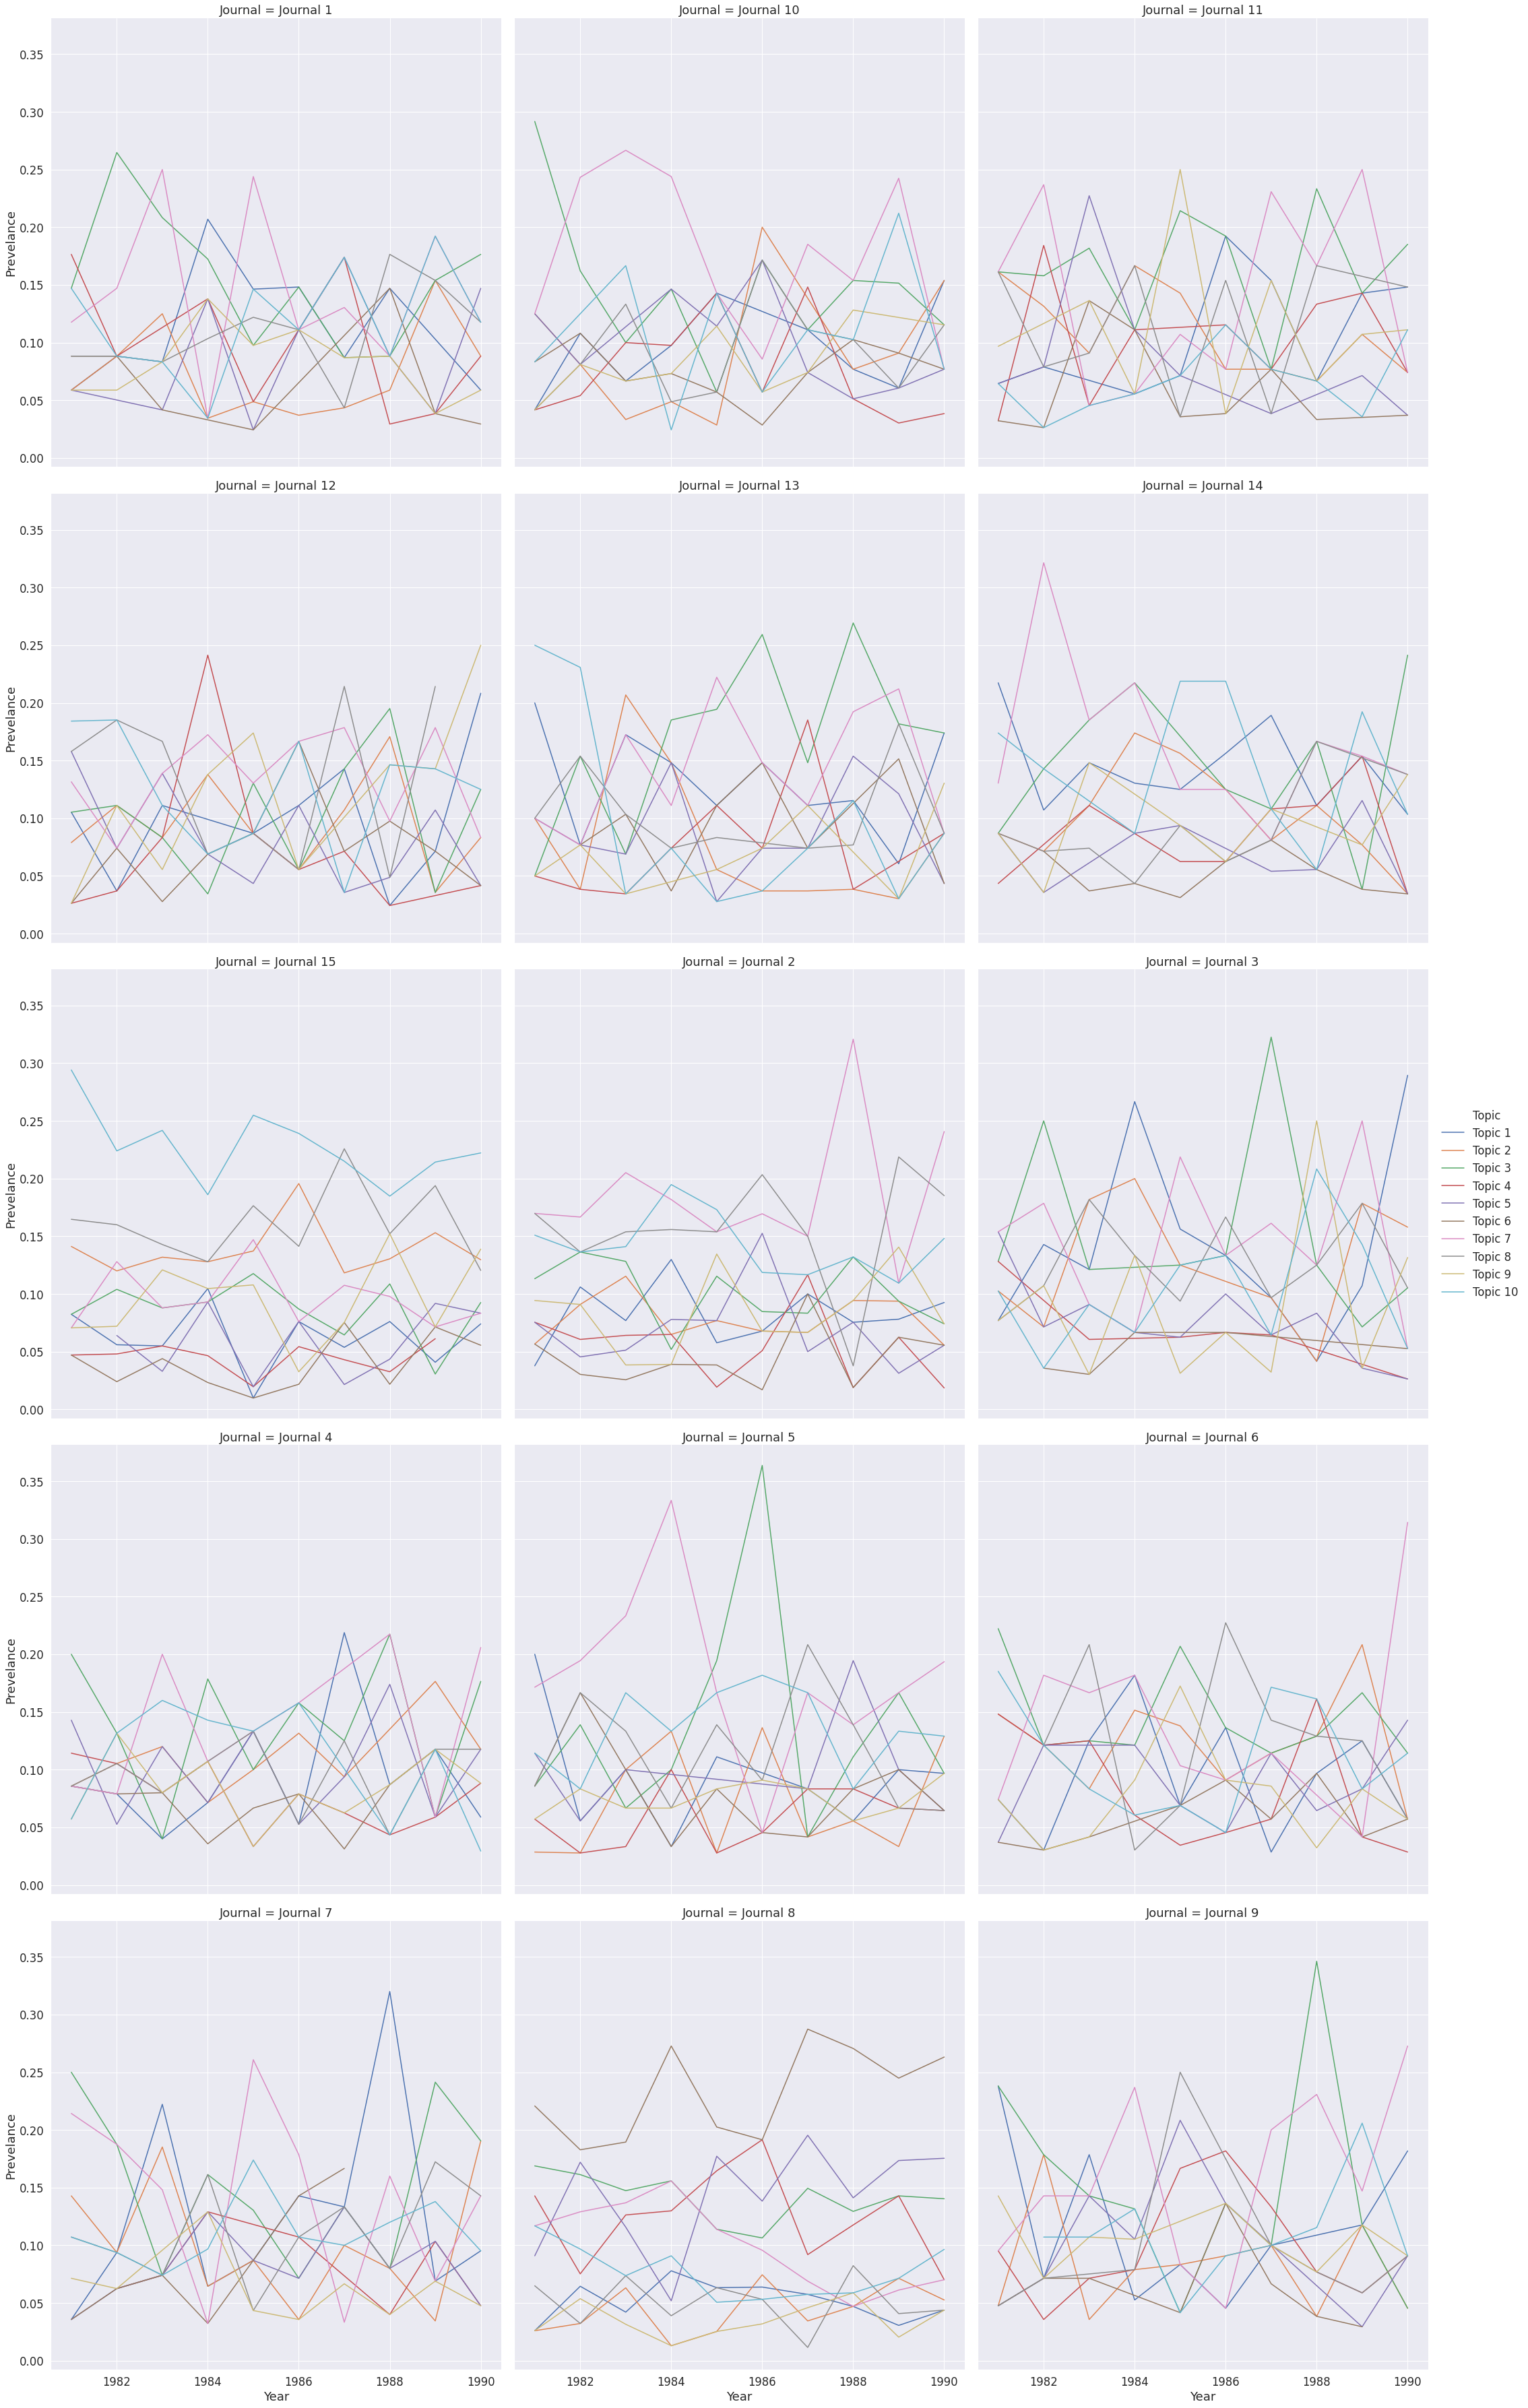

In [ ]:
sns.relplot(x='Year', y="Prevelance", col="Journal", col_wrap=3, hue='Topic',
data=df_melted,
kind="line",
height=10,
style="Topic",
dashes=False,
ci=None);

In [ ]:
df_journals

Dominant    Journal  Year   Topic 1  ...   Topic 7   Topic 8   Topic 9
0         Journal 1  1981  0.058824  ...  0.117647  0.088235  0.058824
1         Journal 1  1982  0.088235  ...  0.147059  0.088235  0.058824
2         Journal 1  1983  0.083333  ...  0.250000  0.083333  0.083333
3         Journal 1  1984  0.206897  ...  0.034483  0.103448  0.137931
4         Journal 1  1985  0.146341  ...  0.243902  0.121951  0.097561
..              ...   ...       ...  ...       ...       ...       ...
145       Journal 9  1986  0.045455  ...  0.045455 NaN        0.136364
146       Journal 9  1987  0.100000  ...  0.200000  0.100000  0.100000
147       Journal 9  1988 NaN        ...  0.230769  0.076923  0.076923
148       Journal 9  1989  0.117647  ...  0.147059  0.058824  0.117647
149       Journal 9  1990  0.181818  ...  0.272727  0.090909  0.090909

[150 rows x 12 columns]

In [ ]:
df_journals.set_index(['Journal', 'Year'], inplace=True)

In [ ]:
# set the figure size
plt.rcParams['figure.figsize'] = [10, 6]

Below is the stacked version of the above graphs.

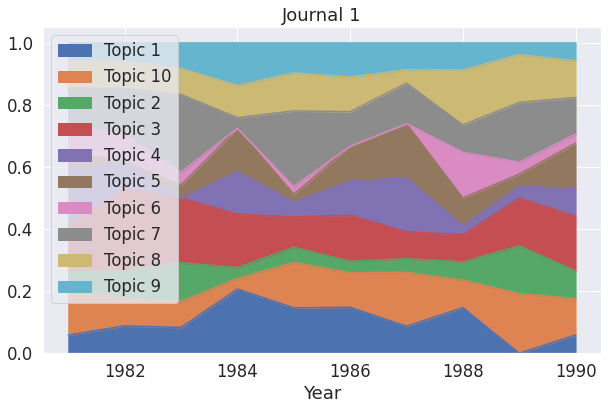

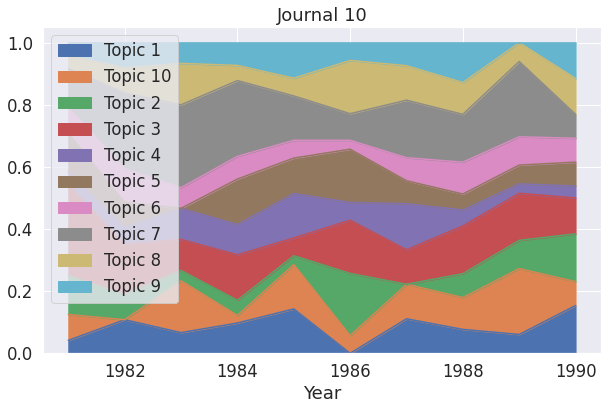

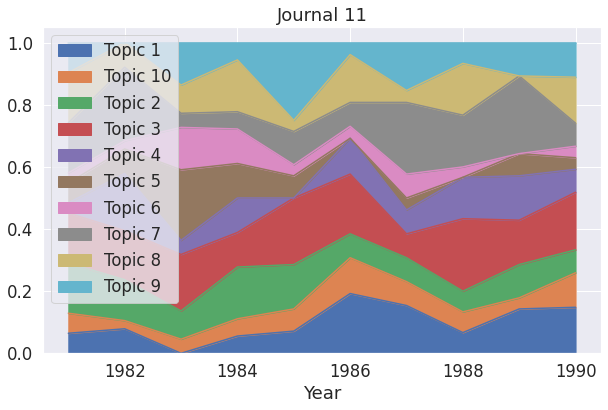

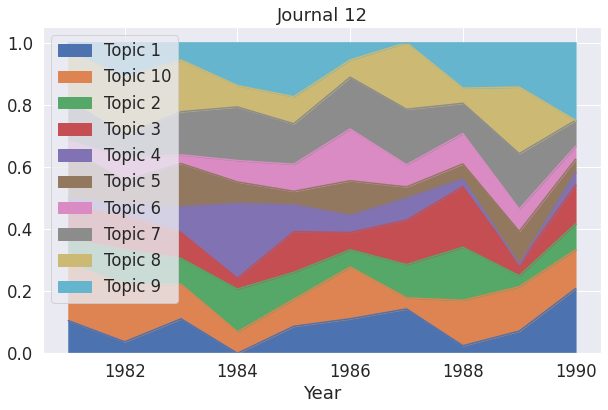

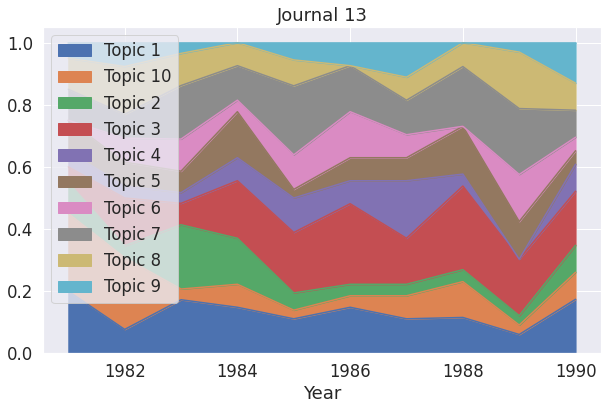

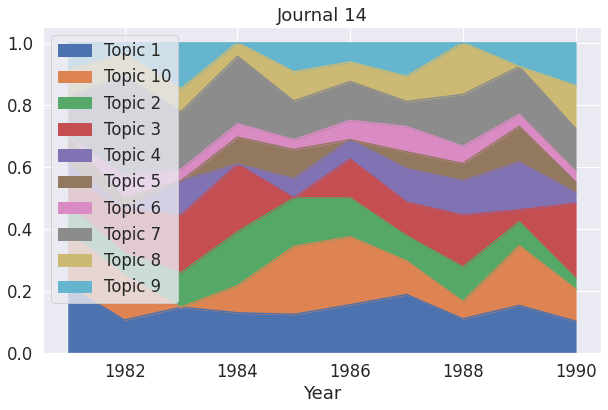

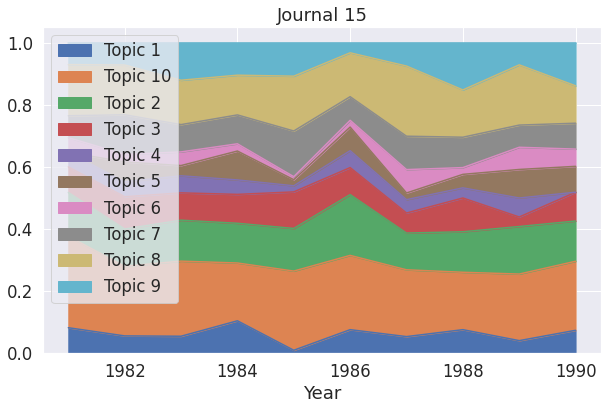

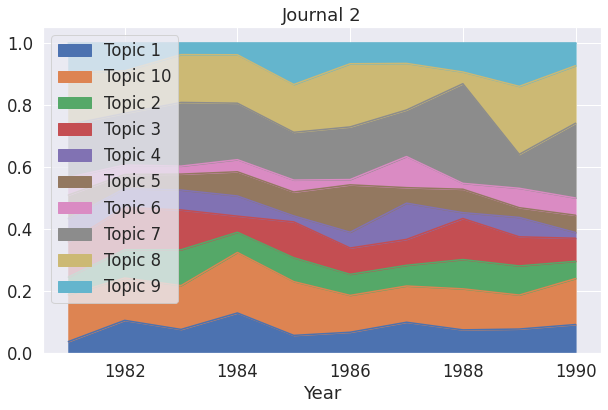

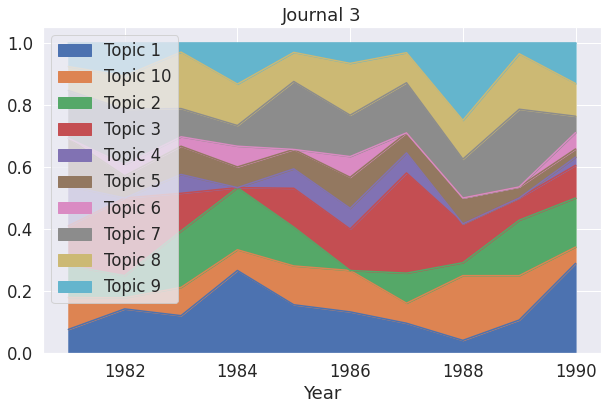

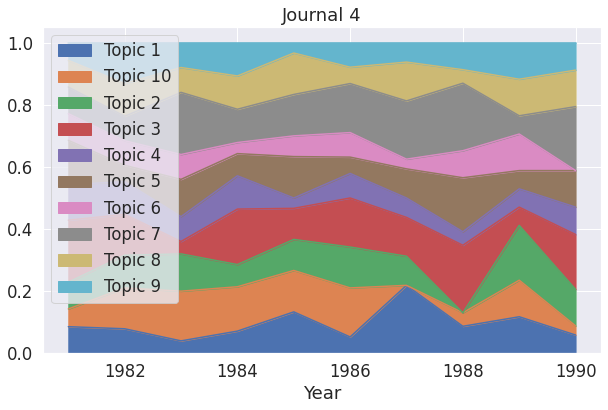

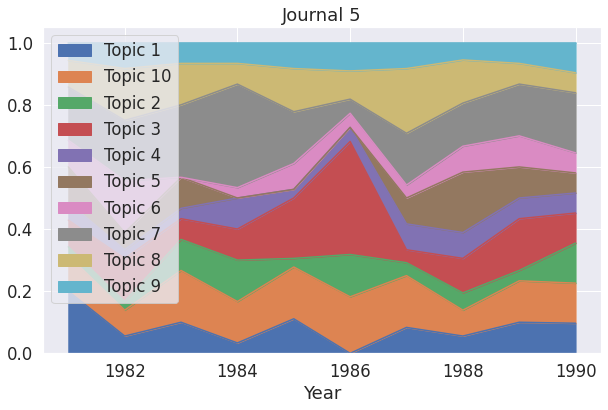

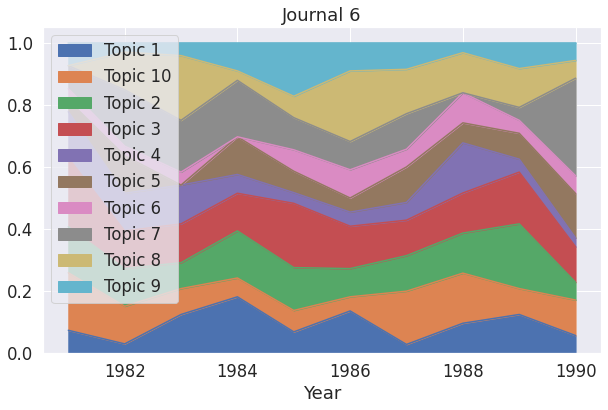

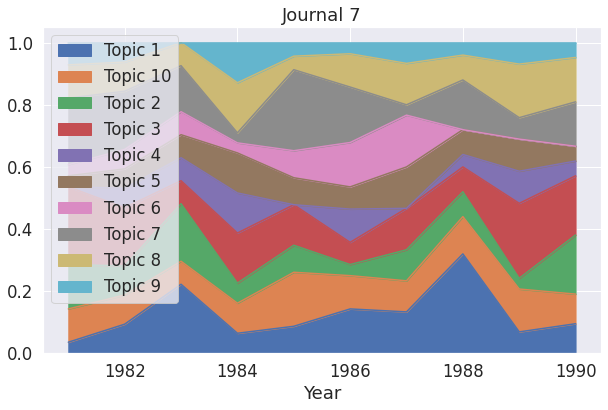

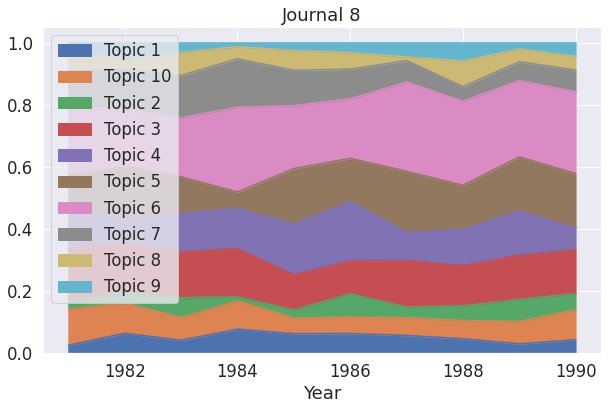

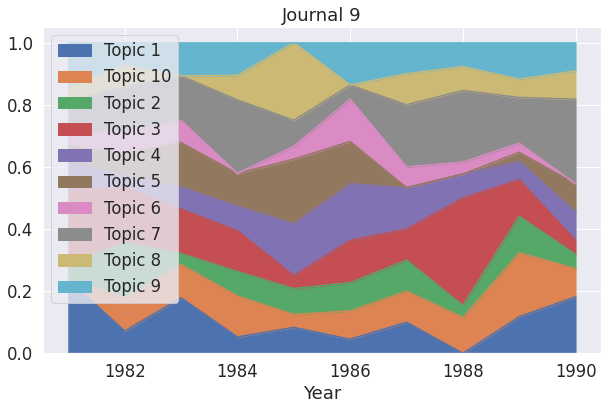

In [ ]:
for j in df_journals.index.levels[0]:
  df_journals.xs(j, level=0).plot.area()
  plt.title(j)
  plt.legend(loc='upper left')

plt.show()

Finding the Optimal Number of Topics

In [ ]:
# display a progress meter
from tqdm import tqdm

def topic_model_coherence_generator(corpus, texts, dictionary, start_topic_count=2, end_topic_count=10, step=1, cpus=1):
  models = []
  coherence_scores = []
  for topic_nums in tqdm(range(start_topic_count, end_topic_count+1, step)):
    mallet_lda_model = gensim.models.wrappers.LdaMallet(mallet_path=mallet_path, corpus=corpus, num_topics=topic_nums,
                                                            id2word=dictionary, iterations=500, workers=cpus)
      
    cv_coherence_model_mallet_lda = gensim. models.CoherenceModel (model=mallet_lda_model, corpus=corpus, texts=texts,
                                                                     dictionary=dictionary, coherence='c_v')
      
    coherence_score = cv_coherence_model_mallet_lda.get_coherence()
    coherence_scores.append(coherence_score)
    models.append(mallet_lda_model)
  return models, coherence_scores

* We build several topic models, with the number of topics ranging from 2 to 50.

In [ ]:
lda_models, coherence_scores = topic_model_coherence_generator(corpus=corpus, texts=data_ready, dictionary=id2word,
                                                               start_topic_count=2, end_topic_count=50, step=2, cpus=16)

  0%|          | 0/25 [00:00<?, ?it/s]/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL
100%|██████████| 25/25 [17:27<00:00, 41.92s/it]


In [ ]:
coherence_df = pd.DataFrame({'Number of Topics': range(2, 51, 2), 'Coherence Score': np.round(coherence_scores, 4)})

#coherence_df.sort_values(by=['Coherence Score'], ascending=False).head(10)

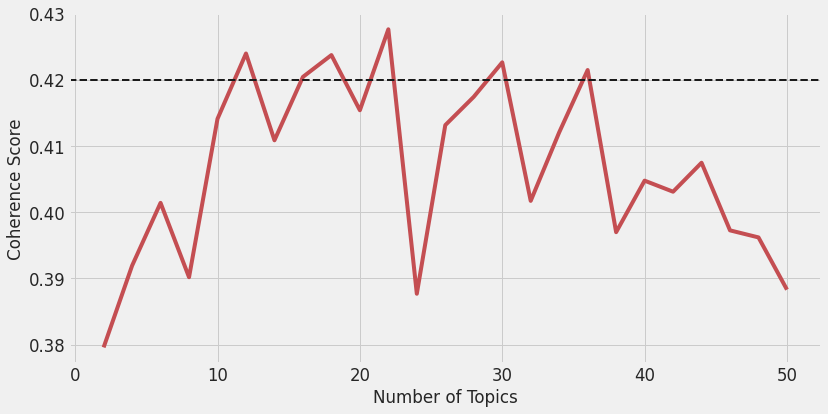

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


x_ax = range(2, 51, 2)
y_ax = coherence_scores

plt.figure(figsize=(12, 6))
plt.plot(x_ax, y_ax, c='r')

plt.axhline(y=0.42, c='k', linestyle='--', linewidth=2)
plt.rcParams['figure.facecolor'] = 'white'

xl = plt.xlabel('Number of Topics')
yl = plt.ylabel('Coherence Score')

plt.show()

* it looks like the score starts increasing rapidly until 12 topics and gradually starts plateauing.